In [1]:
using Random
using CairoMakie
CairoMakie.activate!()

Figure
GridPosition
Axis
Makie.AxisPlot


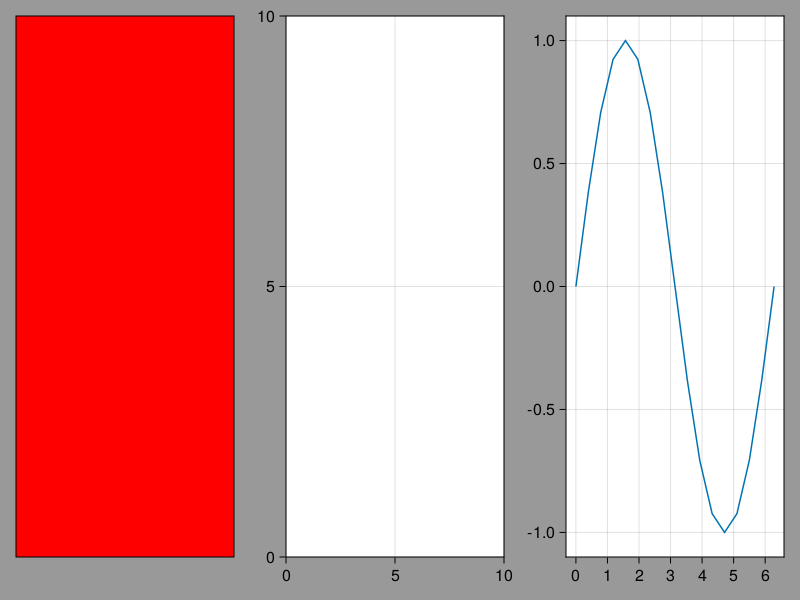

In [2]:
f = Figure(backgroundcolor = :gray60)
box = Box(f[1,1], color=:red)
ax = Axis(f[1,2])
obj = lines(f[1,3], 0:π/8:2π, sin)
println(typeof(f))
println(typeof(f[1,1]))
println(typeof(ax))
println(typeof(obj))
f

In [3]:
num_rolls = 10_000

D12_N = []
D6_N = []
D12_GWF = []
D6_GWF = []

# Simulate Rolls
for _ in 1:num_rolls
    
    # D12 Damage
    d12 = rand(1:12)
    append!(D12_N, d12)
    
    # Great Weapon Figter
    if d12 == 1 || d12 == 2
        d12 = rand(1:12)
    end
    append!(D12_GWF, d12)


    # 2 D6 Damage
    d6a = rand(1:6)
    d6b = rand(1:6)
    append!(D6_N, d6a + d6b)

    # Great Weapon Figter
    if d6a == 1 || d6a == 2
        if d6a > d6b
            d6b = rand(1:6)
        else
            d6a = rand(1:6)
        end
    end
    append!(D6_GWF, d6a + d6b)
    
end 

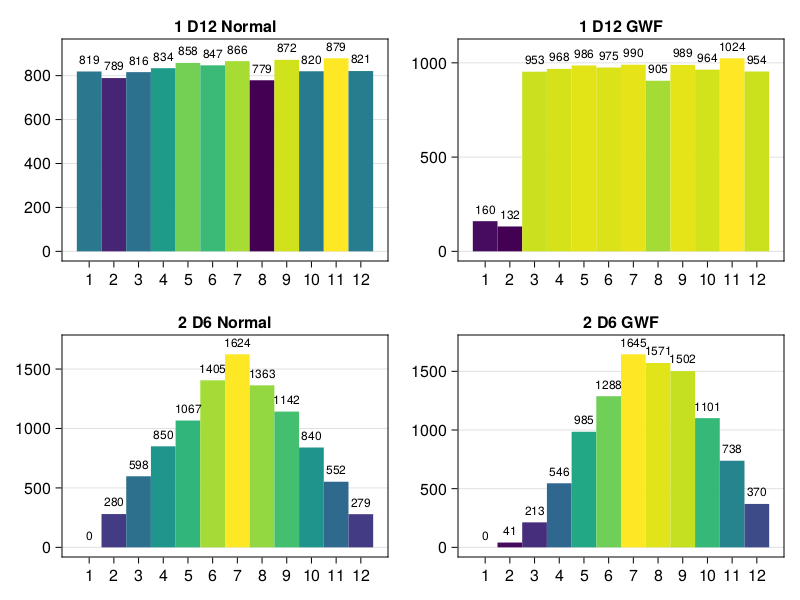

In [4]:
fig = Figure()

ax_params = (xticks=1:12, xgridvisible=false, yautolimitmargin=(0.05f0, 0.1f0))
hist_params = (bins= [i-0.5 for i=1:13], color= :values,
    bar_labels= :values, label_formatter= x-> round(Int, x), label_size= 12)
#

ax = fig[1,1] = Axis(fig, title="1 D12 Normal"; ax_params...)
hist!(ax, D12_N; hist_params...)

ax = fig[1,2] = Axis(fig, title="1 D12 GWF"; ax_params...)
hist!(ax, D12_GWF; hist_params...)

ax = fig[2,1] = Axis(fig, title="2 D6 Normal"; ax_params...)
hist!(ax, D6_N; hist_params...)

ax = fig[2,2] = Axis(fig, title="2 D6 GWF"; ax_params...)    
hist!(ax, D6_GWF; hist_params...)

fig